In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
#import CSV file
df = pd.read_csv('Resources/Data/winequality-white.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.drop_duplicates(keep= 'first', inplace = False)
df.dropna(axis = 'columns', how='all')
df.reset_index(drop =True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.shape

(4898, 12)

In [6]:
#Features for Quality
bins = [2,6,9]
labels = ['Fair', 'Very Good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels) 

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Fair
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Fair
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Fair
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Fair
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Fair


In [8]:
# Assign X (factors) and y (quality)
X = df.drop("quality", axis=1)
y = df["quality"]
print(X.shape, y.shape)

(4898, 11) (4898,)


In [9]:
df['quality'].value_counts()

Fair         3838
Very Good    1060
Name: quality, dtype: int64

In [10]:
#Top5Features
top5_features= X[['alcohol', 'density', 'residual sugar', 'free sulfur dioxide', 'pH']]

# Train Test

### All Features

In [11]:
#All features
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_value, X_test, y_value, y_test= train_test_split(X, y, random_state=42)

In [12]:
X_train.shape, X_value.shape, X_test.shape

((3673, 11), (3673, 11), (1225, 11))

In [13]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [14]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape)

(3673, 11) (1225, 11) (3673,)


### KNN

In [16]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.860
k: 3, Train/Test Score: 0.913/0.834
k: 5, Train/Test Score: 0.877/0.836
k: 7, Train/Test Score: 0.869/0.829
k: 9, Train/Test Score: 0.857/0.819
k: 11, Train/Test Score: 0.851/0.825
k: 13, Train/Test Score: 0.843/0.815
k: 15, Train/Test Score: 0.844/0.820
k: 17, Train/Test Score: 0.841/0.810
k: 19, Train/Test Score: 0.840/0.814


In [35]:
#plt.plot(range(1, 20, 2), train_scores, marker='o')
#plt.plot(range(1, 20, 2), test_scores, marker="x")
#plt.xlabel("k neighbors")
#plt.ylabel("Testing accuracy Score")
#plt.savefig('Resources/images/white_all_features_KNN.jpg')
#plt.show()

In [18]:
 # Note that k: 15 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=3 Test Acc: 0.834


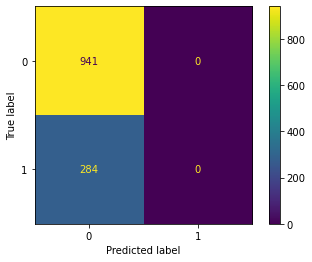

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.savefig('Resources/images/white_all_features_confu_KNN.jpg')

### Top 5 Features

In [20]:
#All features
X_train, X_test, y_train, y_test = train_test_split(top5_features, y, random_state=42)
X_value, X_test, y_value, y_test= train_test_split(top5_features, y, random_state=42)

In [21]:
X_train.shape, X_value.shape, X_test.shape

((3673, 5), (3673, 5), (1225, 5))

In [22]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [23]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape)

(3673, 5) (1225, 5) (3673,)


### KNN

In [25]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

k: 1, Train/Test Score: 1.000/0.825
k: 3, Train/Test Score: 0.906/0.801
k: 5, Train/Test Score: 0.871/0.811
k: 7, Train/Test Score: 0.852/0.801
k: 9, Train/Test Score: 0.849/0.795
k: 11, Train/Test Score: 0.840/0.799
k: 13, Train/Test Score: 0.841/0.796
k: 15, Train/Test Score: 0.833/0.799
k: 17, Train/Test Score: 0.829/0.798
k: 19, Train/Test Score: 0.822/0.801


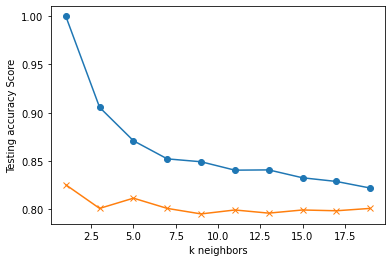

In [26]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig('Resources/images/white_top5_features_KNN.jpg')
plt.show()

In [27]:
 # Note that k: 15 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.811


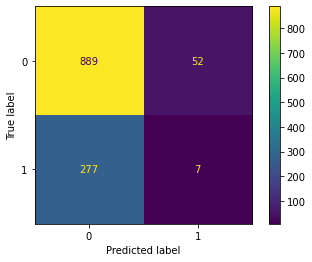

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.savefig('Resources/images/white_top5_features_confu_KNN.jpg')